In [ ]:
##NLP project
NLP sentimental Analyzier
Text Classifier

In [4]:
#load EDA pkgs
import pandas as pd
import numpy as np


In [5]:
#load data Visualization pkgs
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
#kload text cleaning pkgs
import neattext.functions as nfx

In [11]:
#load ML pkgs
#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
#load Dataset
df=pd.read_csv("data/emotion_dataset_2.csv")

In [13]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [14]:
#value count
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

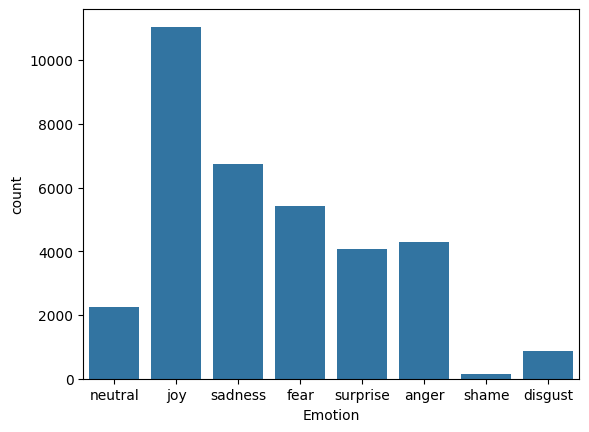

In [15]:
#plot 
sns.countplot(x = 'Emotion', data =df)

In [16]:
#data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [17]:
#user handles
df['Clean_Text']=df['Text'].apply(nfx.remove_userhandles)

In [18]:
#stopwords
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_stopwords)

In [19]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,?
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,34789,anger,A man robbed me today .,man robbed today .
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [21]:
df['Clean_Text']=df['Text'].apply(nfx.remove_special_characters)

In [22]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,Why
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade on my to do list for tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,Such an eye The true hazel eyeand so brillia...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Iluvmiasantos ugh babe hugggzzz for u babe n...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,MichelGW have you gift Hope you like it Its ha...
34788,34788,joy,The world didnt give it to me..so the world MO...,The world didnt give it to meso the world MOST...
34789,34789,anger,A man robbed me today .,A man robbed me today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu call it JEALOUSY I call it of Losing YOU


In [54]:
# features and labels
xfeatures = df ['Clean_Text']
ylabels = df['Emotion']

In [55]:
#split data
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.2, random_state=42)


In [56]:
#build pipeline
from sklearn.pipeline import Pipeline

In [57]:
#logistic Regression
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()),('lr', LogisticRegression())])

In [58]:
#train and fit data
pipe_lr.fit(x_train, y_train)

C:\Users\rabia\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [59]:
pipe_lr

,steps,"[('cv', ...), ('lr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [60]:
#check accuracy
pipe_lr.score (x_test, y_test)

0.6426210662451501

In [61]:
#make a prediction 
exl = "this book was so interesting it made me happy"

In [62]:
pipe_lr.predict([exl])

array(['joy'], dtype=object)

In [63]:
pipe_lr.predict_proba([exl])

array([[4.61553231e-03, 6.88073972e-03, 1.75940088e-03, 8.61102768e-01,
        1.20006767e-03, 2.02599829e-02, 5.93935968e-05, 1.04122115e-01]])

In [64]:
#to know the classes 
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [66]:
# save model and pipeline
import joblib
pipeline_file = open ("emotion_classifier_pipe_lr_07_july_2025.pkl","wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()